In [ ]:
'''Problem Statement:

Predict the daily closing price of a stock using historical data.'''

'Problem Statement:\n\nPredict the daily closing price of a stock using historical data.'

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load stock price data
data = pd.read_csv('/content/stock_prices.csv')
prices = data['Close'].values

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))


In [ ]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use past 60 days to predict the next day
X, y = create_sequences(prices_scaled, seq_length)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# Reshape input data
X_train = X_train.reshape((X_train.shape[0], seq_length, 1))
X_test = X_test.reshape((X_test.shape[0], seq_length, 1))

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - loss: 1.2801e-04 - val_loss: 0.0012
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 2.8512e-06 - val_loss: 9.0656e-04
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 2.5166e-06 - val_loss: 8.9273e-04
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - loss: 2.6064e-06 - val_loss: 4.9728e-04
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - loss: 2.7761e-06 - val_loss: 7.0393e-04
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - loss: 2.6729e-06 - val_loss: 3.8213e-04
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - loss: 2.5066e-06 - val_loss: 3.9934e-04
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - loss: 2.7217e-06 - val_loss: 3.0937e-04
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - loss: 2.7345e-06 - val_loss: 7.8835e-04
Epoch 10/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - loss: 2.3388e-06 - val_loss: 2.5361e-04
Epoch 11/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 21

In [ ]:
# Predict on test data
predictions = model.predict(X_test)

# Inverse transform to get actual prices
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


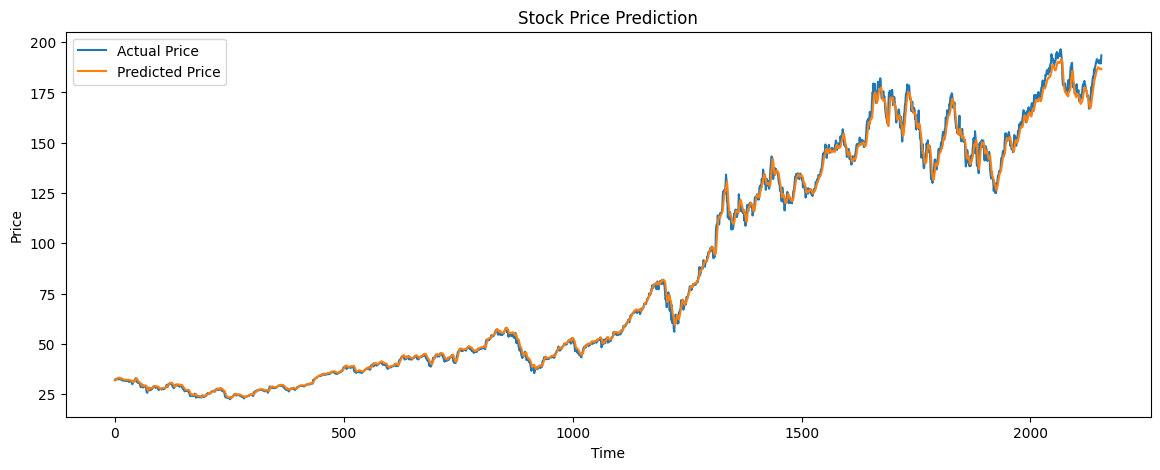

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse, label='Actual Price')
plt.plot(predictions_inverse, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inverse, predictions_inverse)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


MSE: 6.4399
RMSE: 2.5377
MAE: 1.6366
